<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Viz

_Author: Alexander Combs (NYC) Dave Yerrington (SF)_

---

In this guided practice lab you will use `pandas`, `Matplotlib`, and `Seaborn` to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, histograms, and how to manipulate the style of your plots with `Matplotlib`.

We will use primarily the Boston Housing data from the UCI repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

### Pandas Plotting Documentation

Take a moment to look through the [pandas plotting docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

### Create fake data for examples

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

### Load in Boston housing data for exercises

The data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)

In [3]:
housing_csv = '../assets/datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

## Line plots
---

### Line plot with a DataFrame

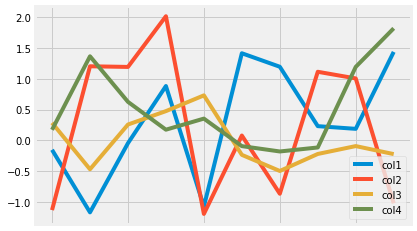

In [4]:
df.plot()

### Line plot with a Series

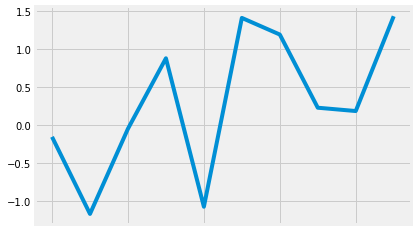

In [5]:
df['col1'].plot()

### Change the size of a plot

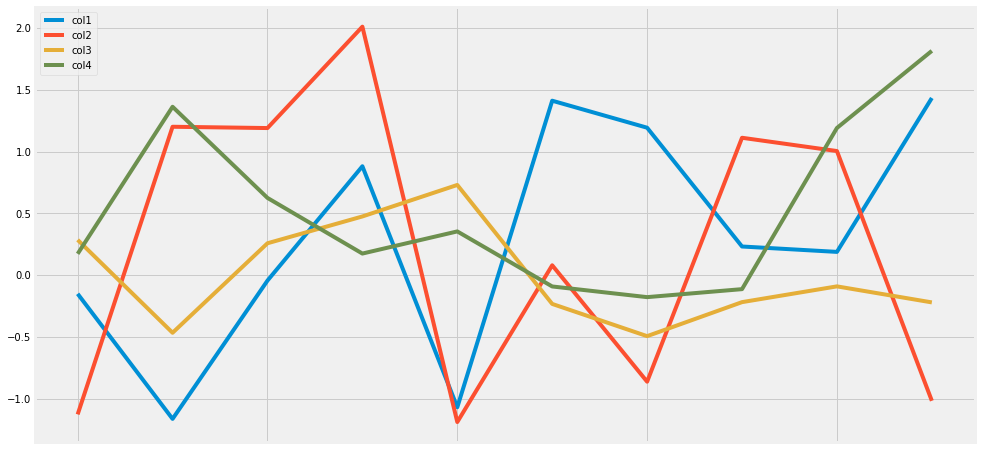

In [6]:
df.plot(figsize=(15,8)) # width, height

### Change the color of a plot

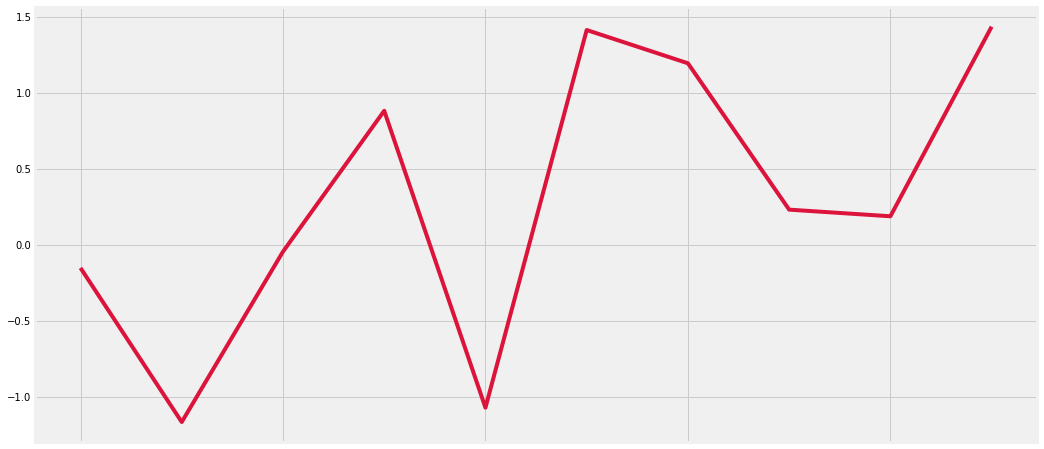

In [7]:
df['col1'].plot(color='crimson', figsize=(16,8))

### Change the style of individual lines

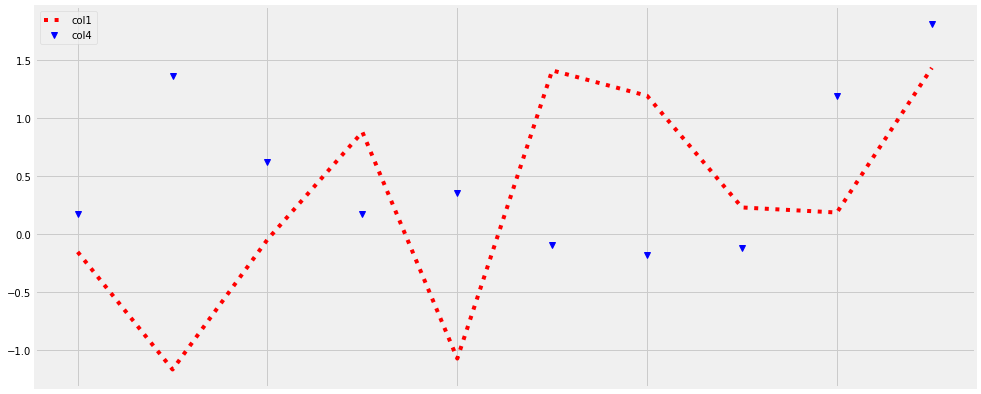

In [8]:
df[['col1', 'col4']].plot(figsize=(15,7), 
                          style={'col1': ':r', 'col4': 'vb'})

### Create a line plot of ZN and INDUS in the housing data. For ZN use a solid green line and for INDUS use a blue dashed line.

- Set the width to 12 and the height to 8.
- Change the style sheet to something you find here [Style Sheets](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

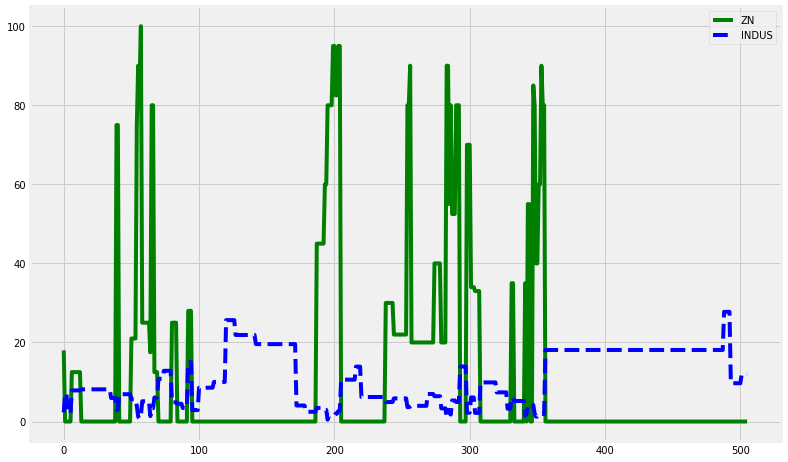

In [9]:
housing[['ZN', 'INDUS']].plot(figsize=(12,8), 
                              style={'ZN': 'g', 'INDUS':'--b'})

## Bar Plots
---

### Bar plot from a series

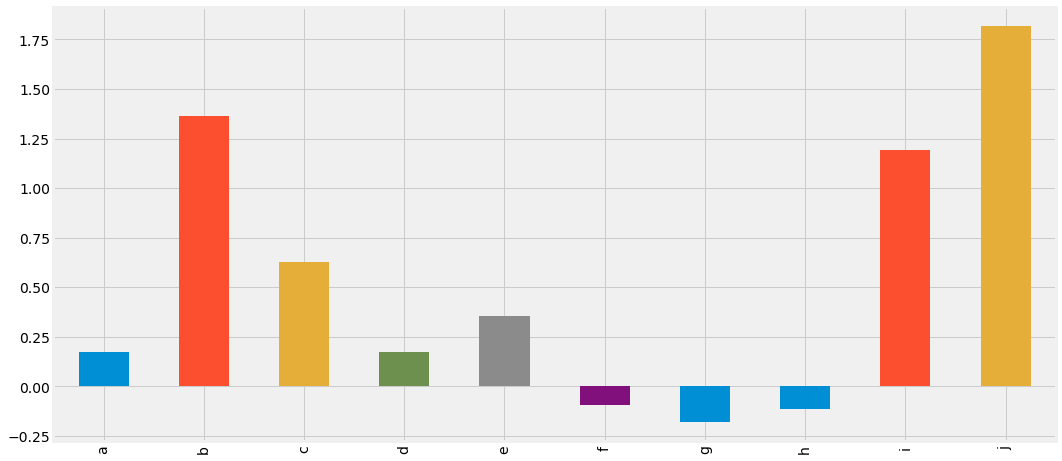

In [10]:
df['col4'].plot(kind='bar', 
                figsize=(16,8), 
                fontsize=14) 

### Using a DataFrame and Matplotlib commands we can get fancy

Text(0.5,0,u'Meaningless x-axis info')

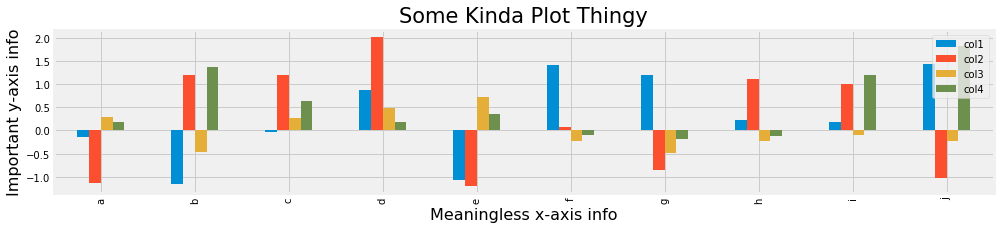

In [11]:
ax = df.plot(kind='bar', figsize=(15,3))

# set the title
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01)

# move the legend
ax.legend(loc=1)

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16)

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

Text(0.5,0,u'Meaningless x-axis info')

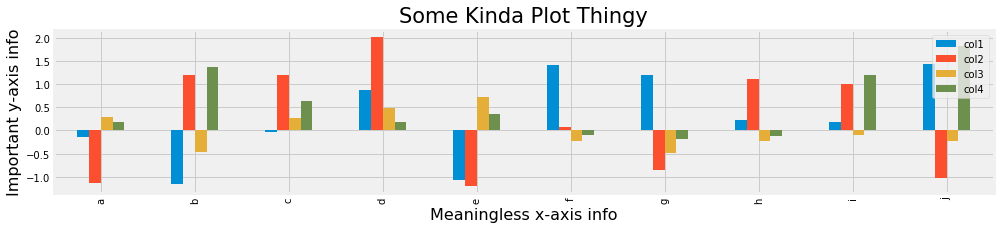

In [44]:
## SAME THINGS WITH PLT


ax = df.plot(kind='bar', figsize=(15,3))

# set the title
plt.title('Some Kinda Plot Thingy', fontsize=21, y=1.01)

# # move the legend
plt.legend(loc=1)

# # x-axis labels
plt.ylabel('Important y-axis info', fontsize=16)

plt.xlabel('Meaningless x-axis info', fontsize=16)

### Horizontal bar plot

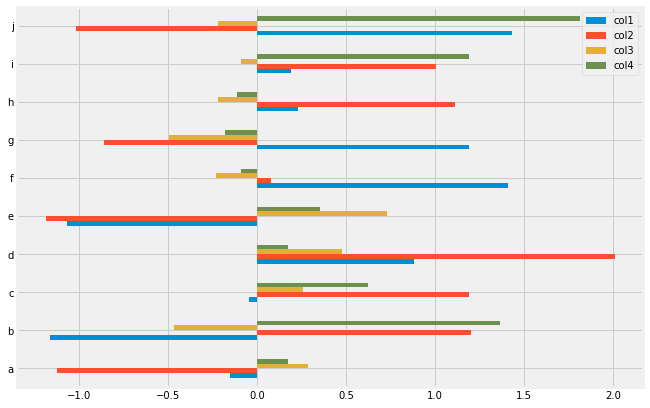

In [12]:
df.plot(kind='barh', figsize=(10,7))

### Create a bar chart using col1 and col2.
- Give it a large title of your choosing. 
- Move the legend to the lower-left corner.

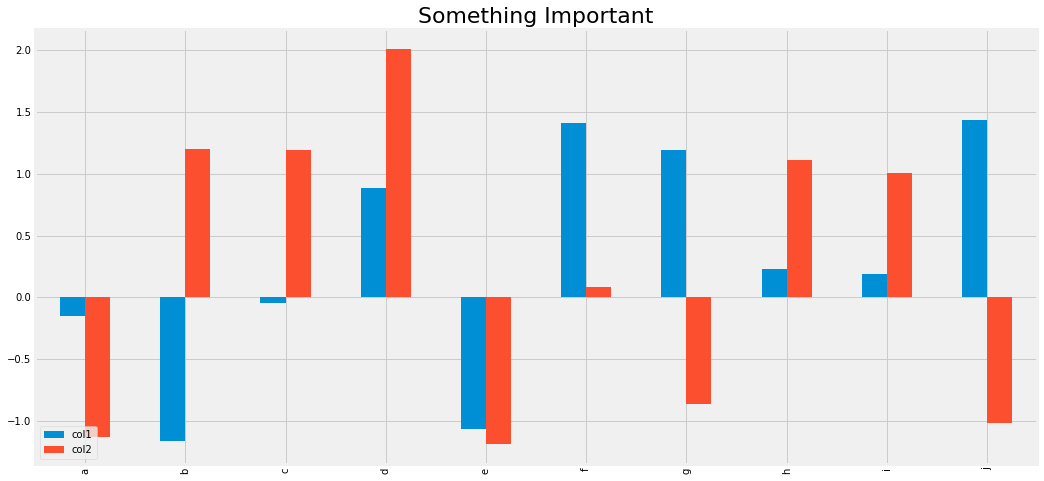

In [13]:
ax = df[['col1','col2']].plot(kind='bar', figsize=(16,8))
ax.set_title('Something Important', fontsize=22)
ax.legend(loc=3)

- Do the same thing but with horizontal bars.
- Move the legend to the upper right.

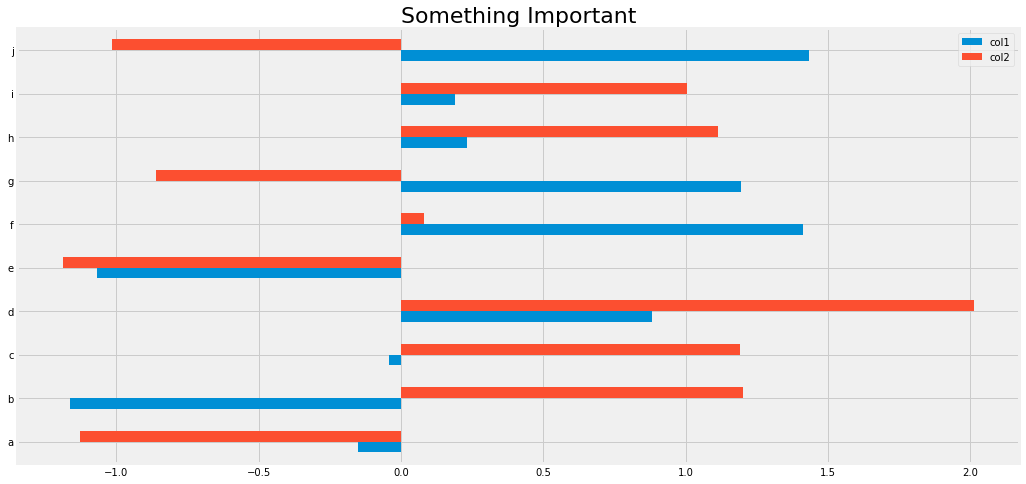

In [14]:
ax = df[['col1','col2']].plot(kind='barh', figsize=(16,8))
ax.set_title('Something Important', fontsize=22)
ax.legend(loc=1)

### We can use stacked bars

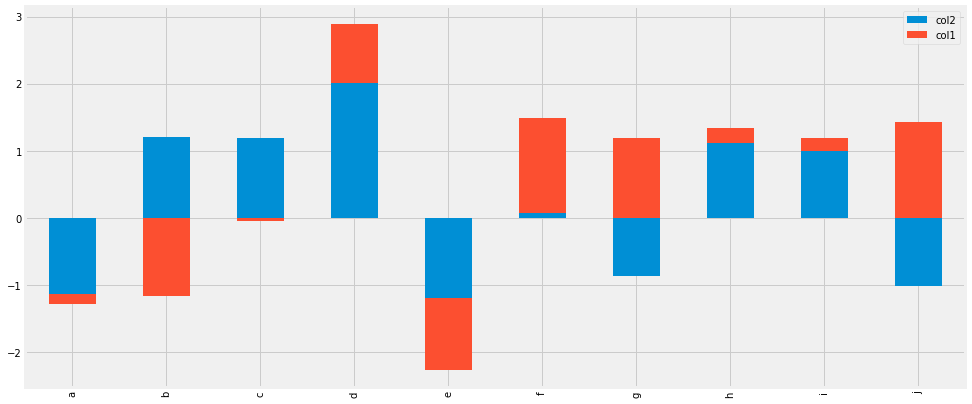

In [15]:
df[['col2', 'col1']].plot(kind='bar', stacked=True, figsize=(15,7))

### Stacked works on horizontal barcharts

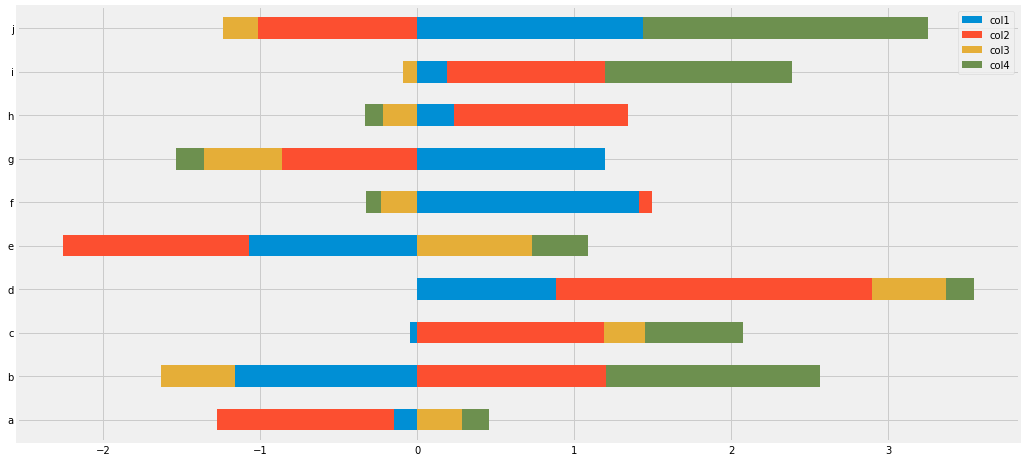

In [16]:
df.plot(kind='barh', stacked=True, figsize=(16,8))

### Plot the `.value_counts()` of `CHAS` using a bar chart

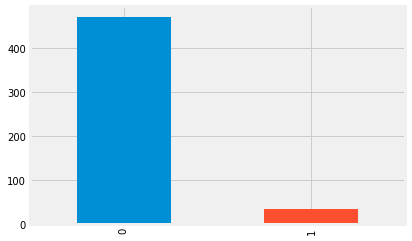

In [17]:
housing['CHAS'].value_counts().plot(kind='bar')

### Create a vertical stacked bar chart using col1 and col2
- What happens when you use `df[['col1', 'col2']]` vs. `df[['col2', 'col1']]`?

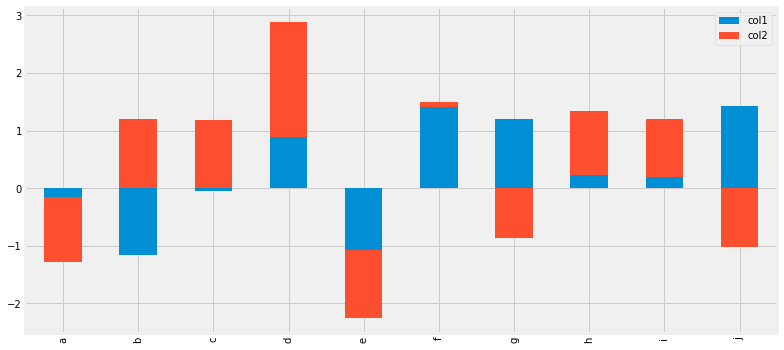

In [18]:
# solution
df[['col1', 'col2']].plot(kind='bar', stacked=True, figsize=(12,6))

### Create a horizontal stacked bar chart using all columns from df

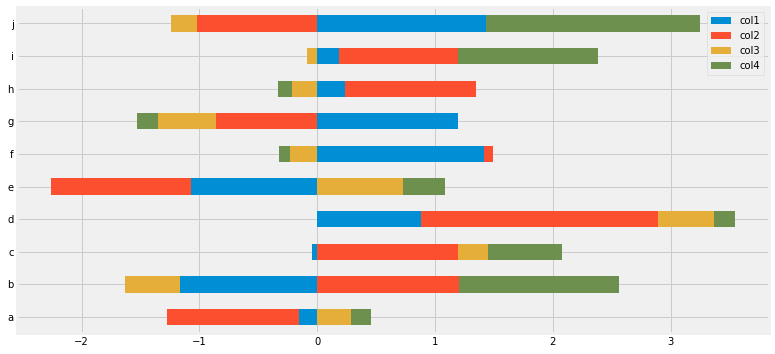

In [19]:
df.plot(kind='barh', stacked=True, figsize=(12,6))

## Histograms
---


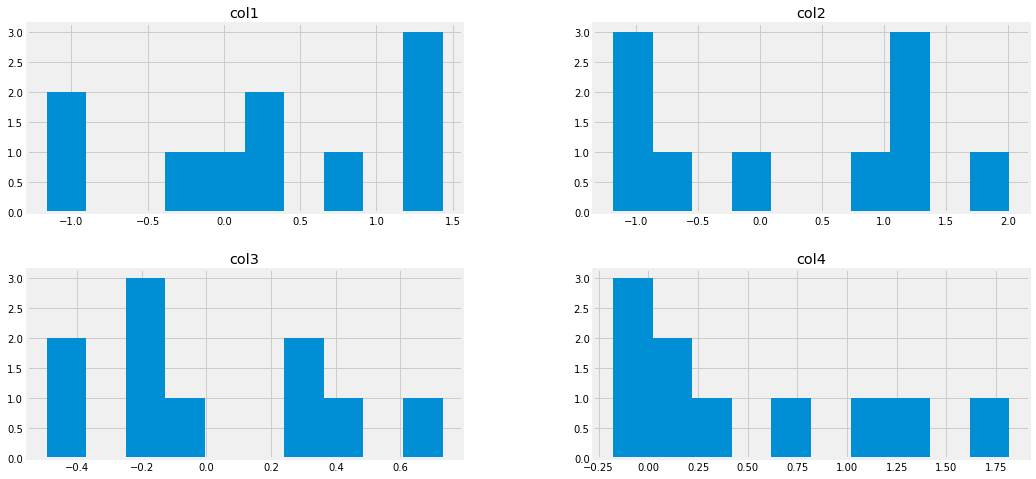

In [20]:
temp = df.hist(figsize=(16,8))

In [45]:
temp[0][0].
plt.show()

SyntaxError: invalid syntax (<ipython-input-45-b40252e05344>, line 1)

### Single historgram

In [46]:
norm = np.random.standard_normal(5000)

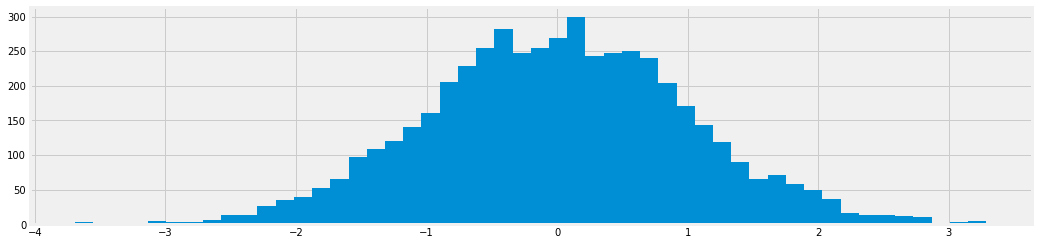

In [47]:
pd.Series(norm).hist(figsize=(16,4), bins=50)

### Bins param adjusts the no. of bins

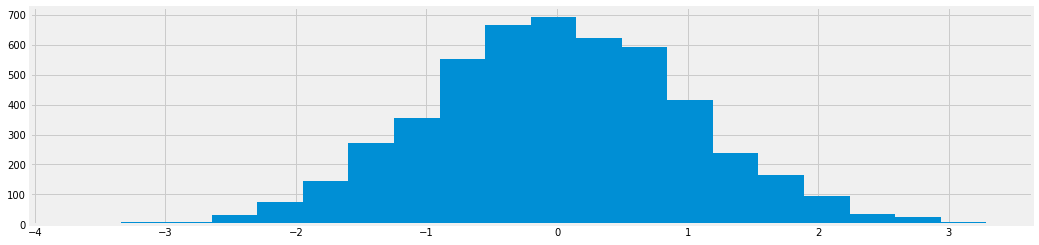

In [48]:
pd.Series(norm).hist(figsize=(16,4), bins=20)

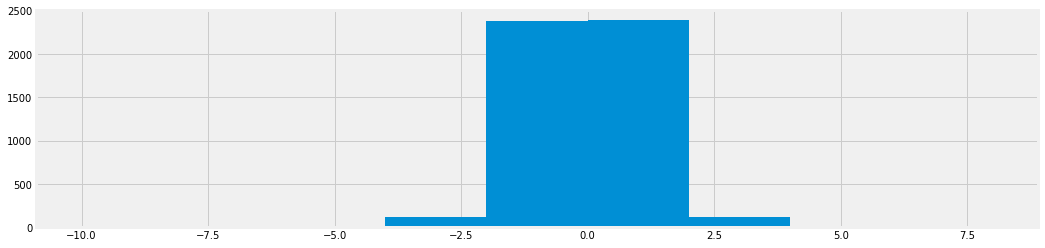

In [62]:
pd.Series(norm).hist(figsize=(16,4), bins=range(-10,10,2))

### Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

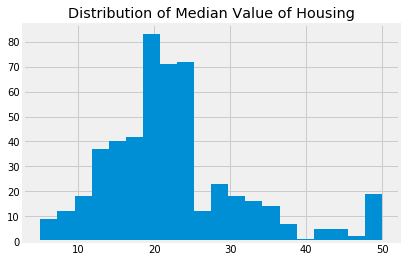

In [49]:
ax = housing['MEDV'].hist(bins=20)
ax.set_title('Distribution of Median Value of Housing');

## Boxplots
---

We can use boxplots to quickly summarize distributions

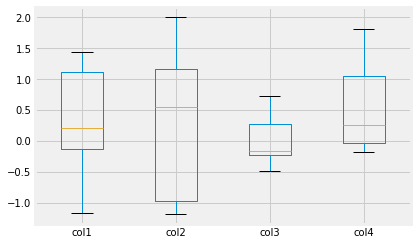

In [50]:
df.boxplot()

### Use a boxplot to preview the distributions in the housing data

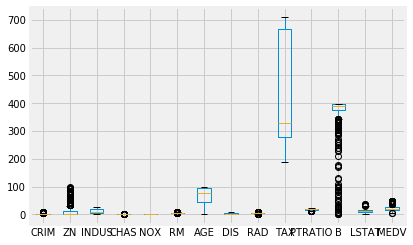

In [51]:
housing.boxplot()

## Scatter Plots
---


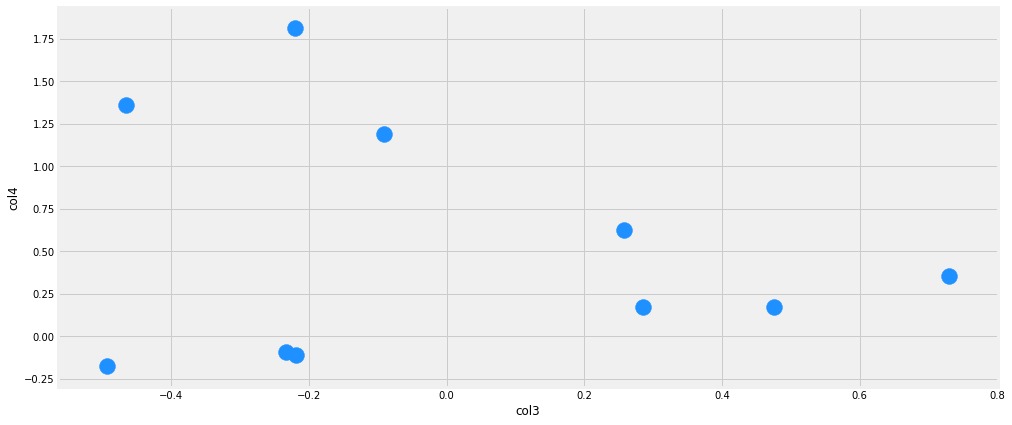

In [52]:
ax = df.plot(x='col3', y='col4', kind='scatter', c='dodgerblue',\
        figsize=(15,7), s=250)

### View the association between the variables `"ZN"` and `"INDUS"` using a scatter plot.

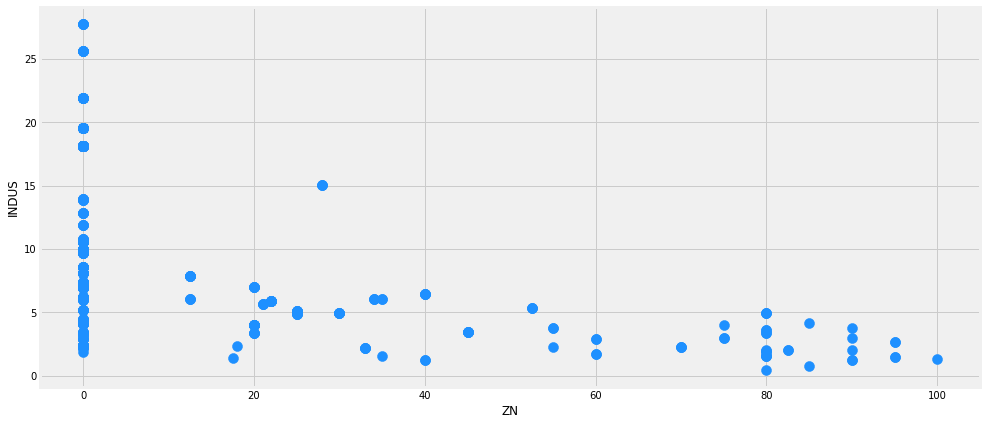

In [53]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100)

### Use a list comprehension to change the size of the scatter plot dots based on `DIS`

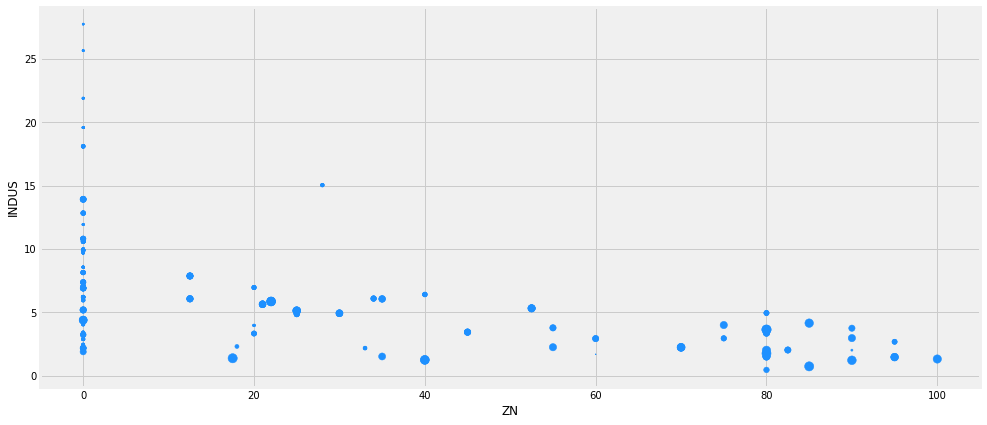

In [54]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']])

## Seaborn `pairplot`

---

With the dataframe object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

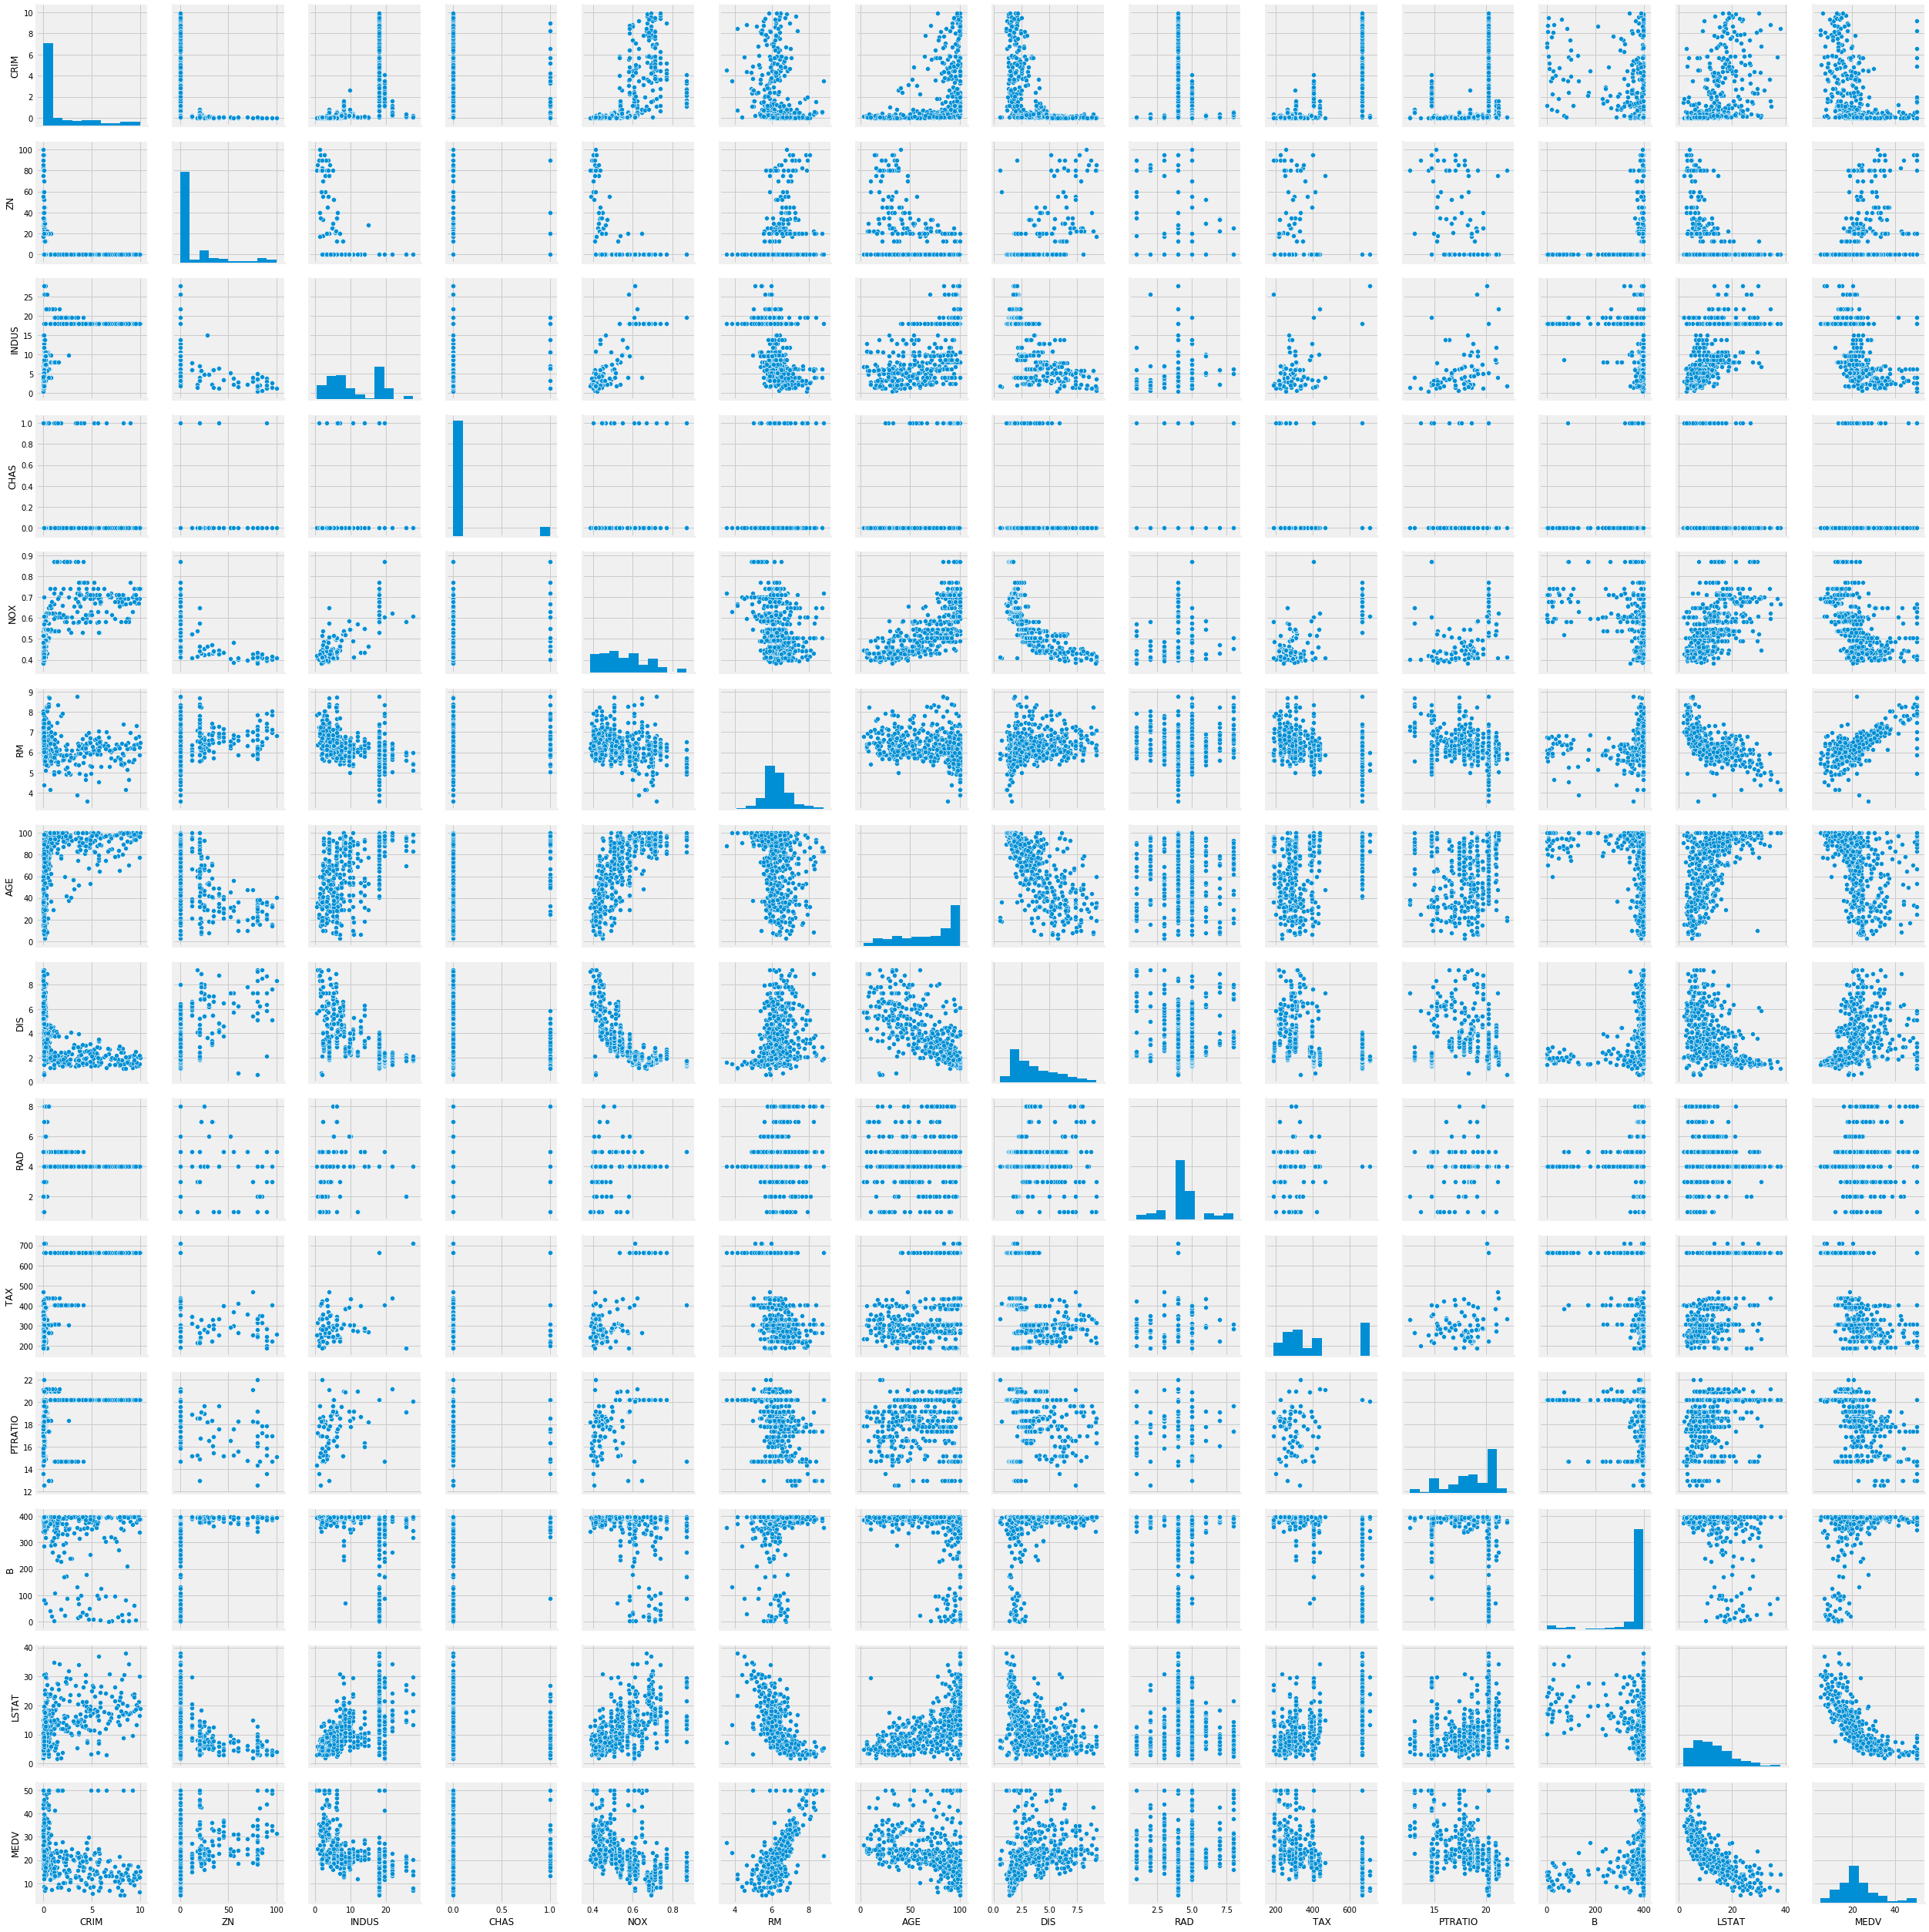

In [55]:
sns.pairplot(housing.sample(1000))

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

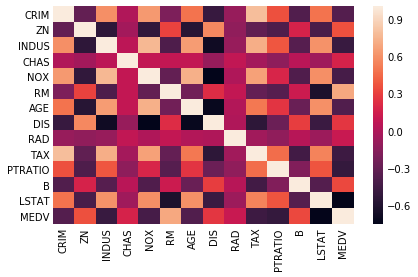

In [56]:
# make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr()
sns.heatmap(housing_correlations)

In [63]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
RAD,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Understanding figures, subplots, and axes

---

Matplotlib uses a blank canvas called a figure

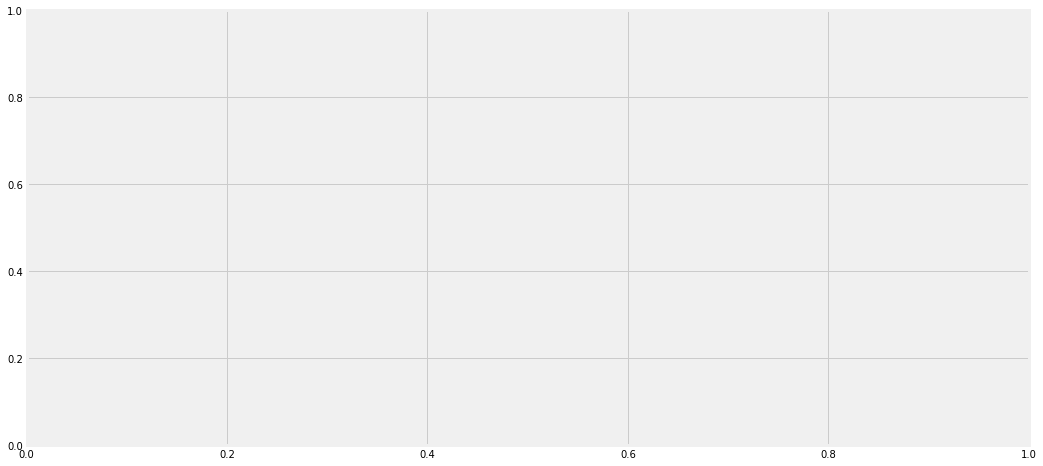

In [57]:
fig = plt.subplots(1,1, figsize=(16,8))

Within this canvas, we can contain smaller objects called axes

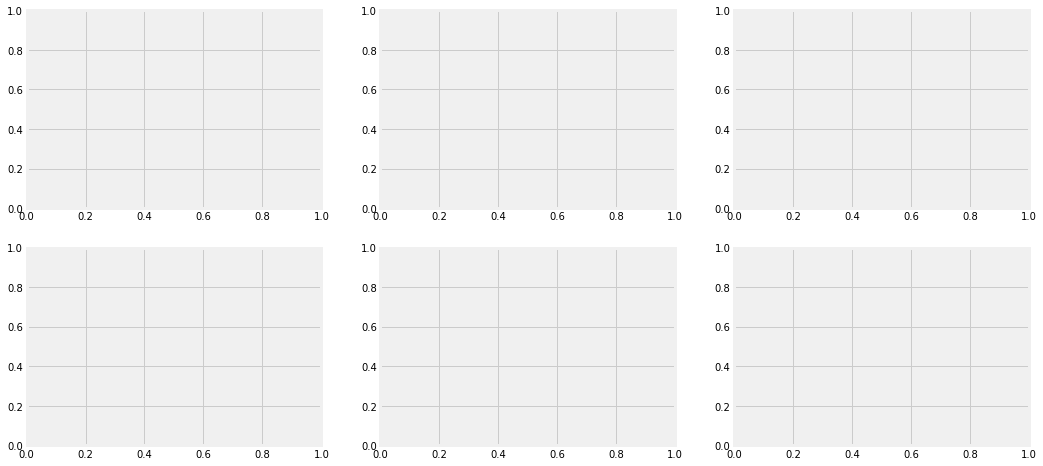

In [58]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

Pandas allows us to plot to a specified axes if we pass the object to the ax paramter.

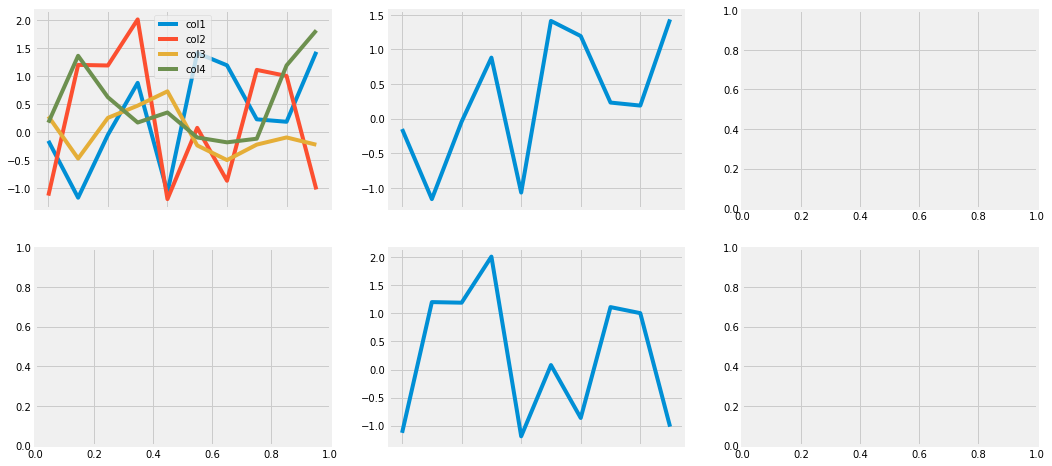

In [59]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0])
df['col1'].plot(ax=axes[0][1])
df['col2'].plot(ax=axes[1][1])

## Let's use a bit more customization
---

Text(0.5,1.01,u'Better-Sized Title')

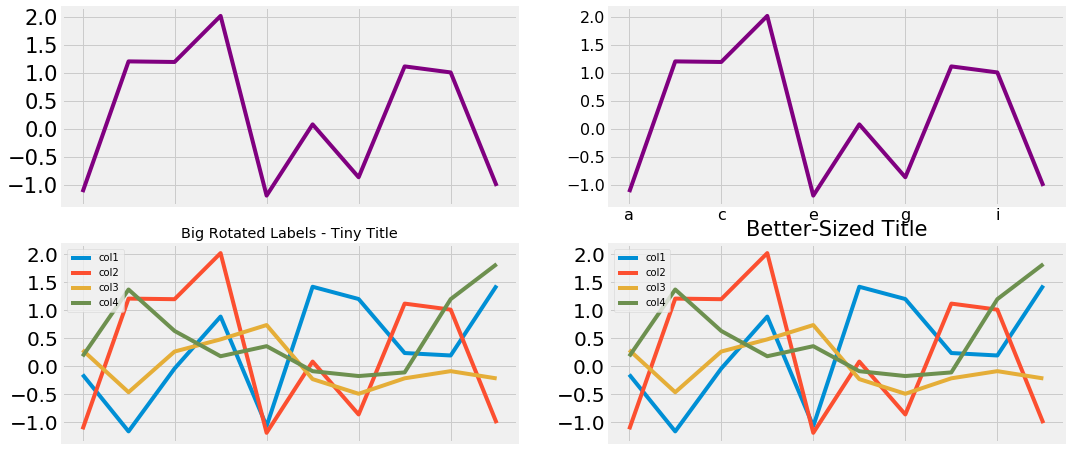

In [60]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible
# list comprehension to get only the even ticks
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use .set_title() to fix title size
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01)